# Regularized Linear Regression Exercise

**In this exercise you will:**
- Extend your linear regression model to produce non-linear regression lines/curve (sometimes referred to as polynomial regression)
- Include regularization to reduce over-fitting (more specifically implement lasso and ridge regression)

## Instructions for All Labs
* Read each cell and implement the TODOs sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Some markdown cells contain questions.
  * For questions <span style="color:red;">colored in red</span>, you must submit your answers in the corresponding Assignment in the course page. Make sure that you enter your responses in the item with the matching question code. Answers that do not follow the prescribed format will automatically be marked wrong by the checker.
  * For questions <span style="color:green;">colored in green</span>, you don't have to submit your answers, but you must think about these questions as they will help enrich your understanding of the concepts covered in the labs.
* You are expected to search how to some functions work on the Internet or via the docs. 
* You may add new cells for "scrap work".
* The notebooks will undergo a "Restart and Run All" command, so make sure that your code is working properly.
* You may not reproduce this notebook or share them to anyone.

In [808]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import csv
import math

plt.style.use('ggplot')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generate Data
Generate some sample data points, and use a sine function over `x` for the `y` values (with random noise).

In [809]:
def generate_sample_data(pts):
    x = np.random.uniform(-1.0,1.0, pts)
    y = np.sin(6 * x) + np.random.randn(pts) * 0.5
    return x, y

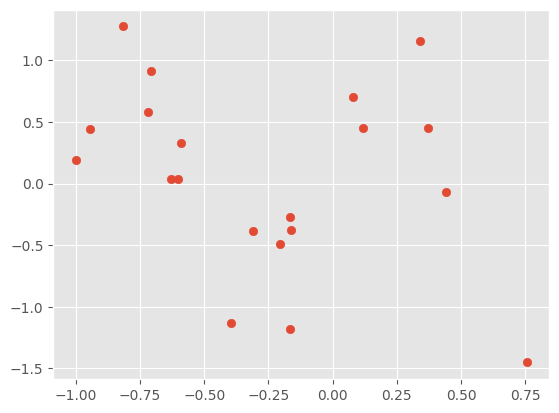

In [810]:
pts = 20
np.random.seed(1)
over_x, over_y = generate_sample_data(pts)

plt.scatter(over_x,over_y)

## Bias-variance trade-off

### Plotting the optimal model

Look at the figure above. The code who generated the point of that graph follows a sine function, so we know exactly what the best looking model for the data above should look like:

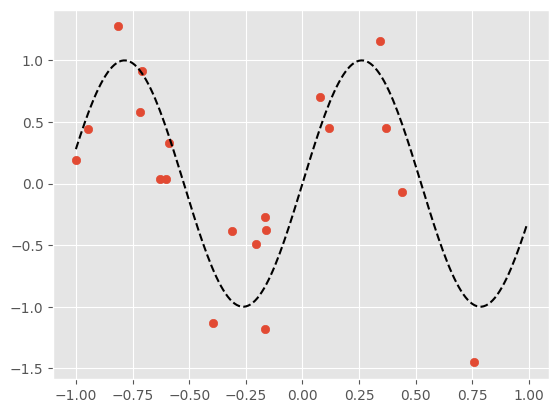

In [811]:
plt.scatter(over_x,over_y)

x_range = np.arange(-1, 1, 0.01)
y_range = np.sin(6 * x_range)
plt.plot(x_range, y_range, 'k--')

The black dotted line is the target function `f(x)` that generated the red dots (after some additional errors)

Take note that in real world scenarios, we are talking about hundreds to millions of features. So, the ability to "look at the data and just draw the curve that feels right" is a luxury we can enjoy now with this small dataset. With real world data, this is not the case, and we can most likely cannot visualize all features altogether in one graph.

### Plotting a plain analytical solution model 
Plotting the analytical solution/closed form/normal equation model 

To do this, use the function `np.polyfit()` which is similar to the closed form equation from the last notebook. We won't do any feature transformation yet, i.e., just degree == 1. Assign the return value to variable `weights`.

In [812]:
# Write your code here
weights = np.polyfit(x_range, y_range, 1)

The function `np.poly1d()` returns a function that will perform the feature transform for us given the weights. Assign the return value to variable `fit_fn`.

In [813]:
# Write your code here
fit_fn = np.poly1d(weights)

`y_range` uses `fit_fn` to transform the data prior to getting the score/predictions (no effect for now because it is still degree=1)

In [814]:
x_range = np.arange(np.min(over_x), np.max(over_x), 0.01)
y_range = fit_fn(x_range)

Then, we finally plot the analytical solution model

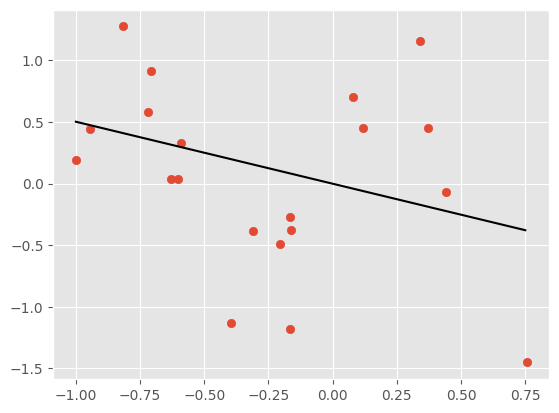

In [815]:
plt.plot(x_range, y_range, 'k')
plt.scatter(over_x, over_y)

It is clear that this line, no matter which way you change the slope to another direction, will still not do a great job. This is because it is simply a line that we are forcing to model a sine functiom. We call this underfitting because we are not fitting the model to the data well. We also say that this model has a high bias, because our estimate is far off the actual data. Look at the chart below at the far left:

<img width="700px" src="https://imgur.com/mJLDfBs.png" />

One way to remedy this is to increase the order or degree of our hypothesis function through feature transformation. With polynomial feature transformation, we can generate more complex functions, and get a better fit of our dataset.

Let's try to do the same thing, and increase the polynomial degree complexity of our model. 


We normally do this by adding features based on our original features. The `np.polyfit()` function has a way to increase the polynomial degree on its own.

### Plotting a more complex analytical solution model 

This time, let's perform feature transform in our data.

In [816]:
x_range = np.arange(np.min(over_x), np.max(over_x) + 0.01, 0.01)
print('x_range: ', x_range[:10])

x_range:  [-0.99977125 -0.98977125 -0.97977125 -0.96977125 -0.95977125 -0.94977125
 -0.93977125 -0.92977125 -0.91977125 -0.90977125]


Perform feature transform to our data by using the function `np.polyfit()` and setting the degree to `3`. Assign the return value to variable `weights`. Then, assign the feature transform function to variable `fit_fn`.

In [817]:
# Write your code here
weights = np.polyfit(over_x, over_y, 3)
fit_fn = np.poly1d(weights)

Plot the resulting model.

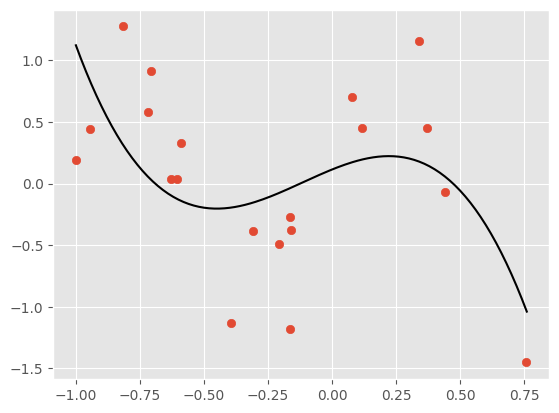

In [818]:
y_range = fit_fn(x_range)
plt.plot(x_range, y_range, 'k')
plt.scatter(over_x, over_y)

Perform feature transform to our data by using the function `np.polyfit()` and setting the degree to `5`. Assign the return value to variable `weights`. Then, assign the feature transform function to variable `fit_fn`.

In [819]:
# Write your code here
weights = np.polyfit(over_x, over_y, 5)
fit_fn = np.poly1d(weights)

Plot the resulting model.

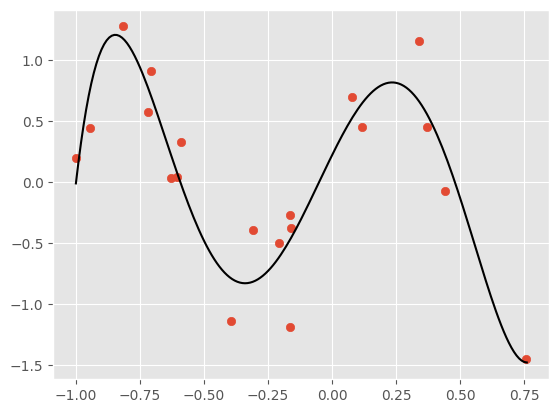

In [820]:
y_range = fit_fn(x_range)
plt.plot(x_range, y_range, 'k')
plt.scatter(over_x, over_y)

Perform feature transform to our data by using the function `np.polyfit()` and setting the degree to `8`. Assign the return value to variable `weights`. Then, assign the feature transform function to variable `fit_fn`.

In [821]:
# Write your code here
weights = np.polyfit(over_x, over_y, 8)
fit_fn = np.poly1d(weights)

Plot the resulting model.

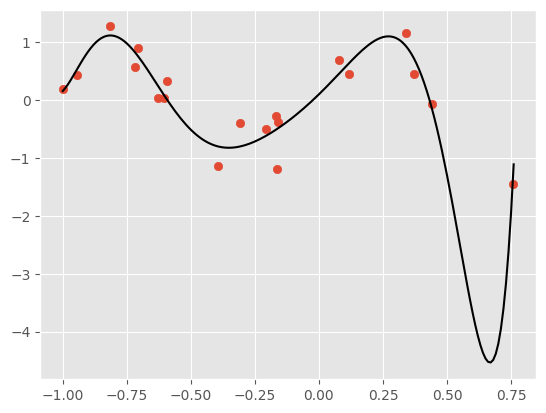

In [822]:
y_range = fit_fn(x_range)
plt.plot(x_range, y_range, 'k')
plt.scatter(over_x, over_y)

Perform feature transform to our data by using the function `np.polyfit()` and setting the degree to `12`. Assign the return value to variable `weights`. Then, assign the feature transform function to variable `fit_fn`.

In [823]:
# Write your code here
weights = np.polyfit(over_x, over_y, 12)
fit_fn = np.poly1d(weights)

Plot the resulting model.

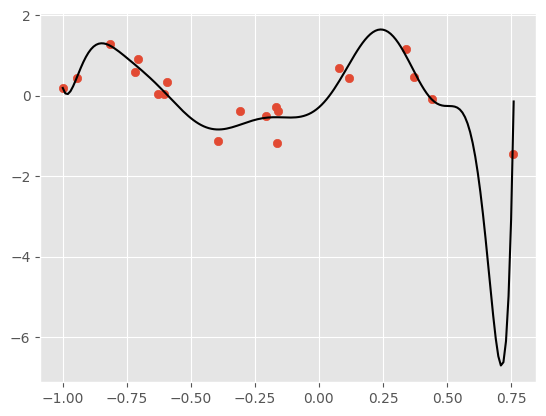

In [824]:
y_range = fit_fn(x_range)
plt.plot(x_range, y_range, 'k')
plt.scatter(over_x, over_y)

Look at the last generated model (polynomial degree of 12). It definitely got a lot of data correct, but we know that this is not the sine wave function where the data actually came from and what we want to model.

You may also notice that it dipped/peaked into some points that are unneccessary. It has freedom to do this as long as the data it wants to target are met.

We call this overfitting, because while it will work well with this particular set of data, it might do badly with other data points. Overfitting gives us a low training error (good!), but a high test error (bad!). 

We're going to generate more sample (100) data points and treat them as our test data. Take note that we are taking this from our original target function `f(x)`.

In [825]:
pts = 100
test_x, test_y = generate_sample_data(pts)

print('test_x: ', test_x[:10])
print('test_y: ', test_y[:10])

test_x:  [-0.01685368 -0.89327491  0.14823521 -0.70654285  0.17861107  0.39951672
 -0.79533114 -0.17188802  0.38880032 -0.17164146]
test_y:  [ 0.32213049  0.36798076  0.95197405  0.23400383  0.85865163 -0.13028763
  1.55893343 -0.65353172  0.7111444  -1.24480193]


We will plot the test data as blue `+`s, and reuse the red dots for our train data. Then let us see how our model was able to capture our new data from the same distribution.

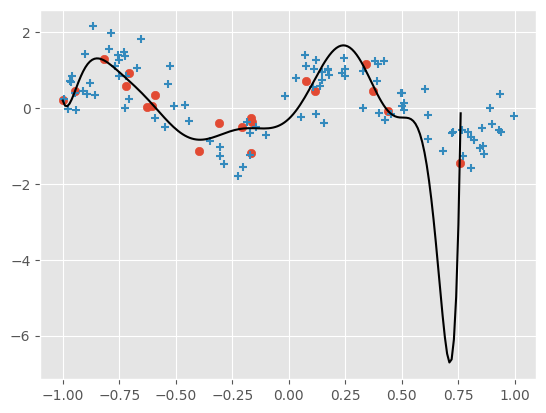

In [826]:
plt.scatter(over_x, over_y)
plt.scatter(test_x, test_y, marker='+')

x_range = np.arange(np.min(over_x), np.max(over_x) + 0.01, 0.01)
y_range = fit_fn(x_range)
plt.plot(x_range, y_range, 'k')

You can now see that our training data (red dots) are covered correctly, but the test data (blue +) from the same distribution as our training data are mostly missed. So, yes, this complex model captured our training data well. But since our data is also inherently noisy, this causes the model to fit the noise as well.

Observe what will happen if we try different values for the degree `order`:

In [827]:
orders = np.arange(1, 18, 2)
orders

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17])

Complete the code below to display the plot of the resulting model for each order in variable `orders`.

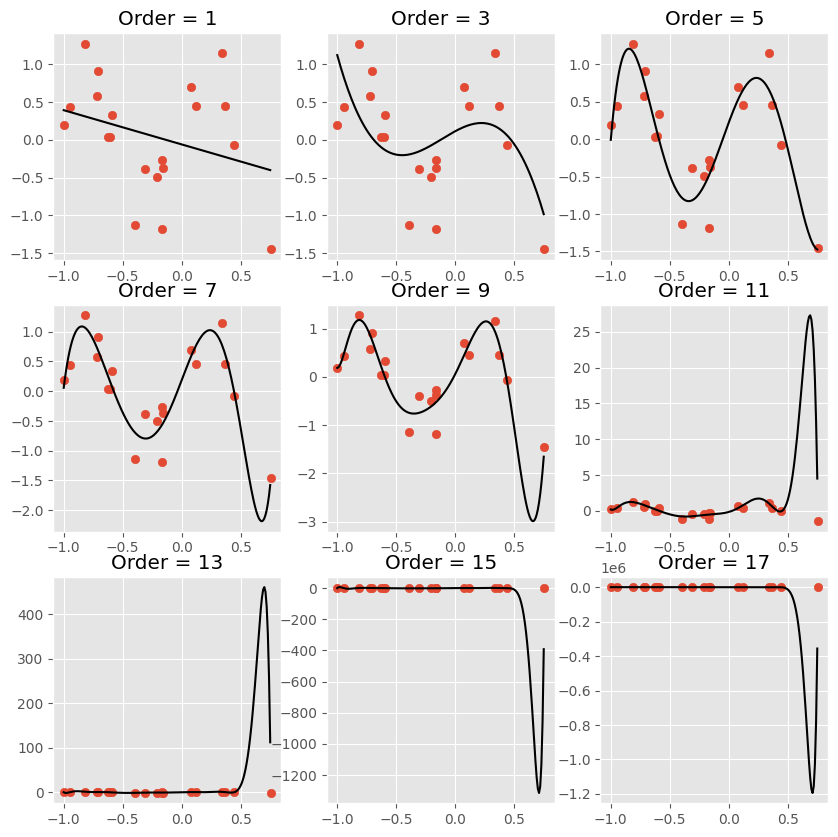

In [828]:
weights = {}
plt.figure(figsize=(10, 10))
for i in range(len(orders)):
    order = orders[i]

    # Write your code here
    weight = np.polyfit(over_x, over_y, order)
    fit_fn = np.poly1d(weight)
    
    plt.subplot(3, 3, i + 1)
    plt.scatter(over_x, over_y)

    X_range = np.arange(np.min(over_x), np.max(over_x), 0.01)
    y_range = fit_fn(X_range)
    plt.plot(X_range, y_range, 'k')
    plt.title('Order = ' + str(orders[i]))
    
    # This will get the weights of the generated model
    weights[order] = weight

**Sanity Check:** You should see 9 figures in a 3x3 grid. Each grid shows the hypothesis model in increasing complexity.

<span style="color:red;">**Question 3-1**: Does the model with the order set to 15 have high or low bias? Does it exhibit low or high variance?</span>

low bias : high variance

Print the weights of a model that is underfit.

Text(0.5, 1.0, 'Order = 1')

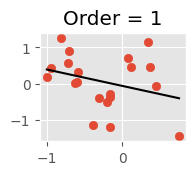

In [829]:
# Write your code here
order = 1

weight = np.polyfit(over_x, over_y, order)
fit_fn = np.poly1d(weight)

plt.subplot(3, 3, i + 1)
plt.scatter(over_x, over_y)

X_range = np.arange(np.min(over_x), np.max(over_x), 0.01)
y_range = fit_fn(X_range)
plt.plot(X_range, y_range, 'k')
plt.title('Order = ' + str(order))

And, print the weights of a model that is overfit.

Text(0.5, 1.0, 'Order = 15')

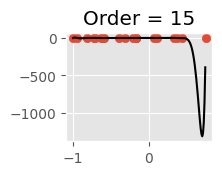

In [830]:
# Write your code here
order = 15

weight = np.polyfit(over_x, over_y, order)
fit_fn = np.poly1d(weight)

plt.subplot(3, 3, i + 1)
plt.scatter(over_x, over_y)

X_range = np.arange(np.min(over_x), np.max(over_x), 0.01)
y_range = fit_fn(X_range)
plt.plot(X_range, y_range, 'k')
plt.title('Order = ' + str(order))

And, print the weights of a model that fits the data well.

Text(0.5, 1.0, 'Order = 9')

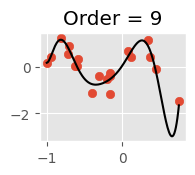

In [831]:
# Write your code here
order = 9

weight = np.polyfit(over_x, over_y, order)
fit_fn = np.poly1d(weight)

plt.subplot(3, 3, i + 1)
plt.scatter(over_x, over_y)

X_range = np.arange(np.min(over_x), np.max(over_x), 0.01)
y_range = fit_fn(X_range)
plt.plot(X_range, y_range, 'k')
plt.title('Order = ' + str(order))

<span style="color:red;">**Question 3-2**: What are the notable differences in terms of the values of the weights of each of the models (aside from the number of weights)?</span>

<span style="color:red;">**Question 3-2**: What are the notable differences in terms of the values of the weights of each of the models (aside from the number of weights)?</span>

The notable differences in terms of the values of the weights of each of the models are:

1. **Magnitude of Weights**: As the polynomial degree increases, the magnitude of the weights tends to increase significantly. This indicates that higher-degree polynomials are more sensitive to the training data, leading to larger coefficients.

2. **Sign of Weights**: The signs of the weights can vary significantly between different polynomial degrees. This variation indicates that the model is trying to fit the data more closely, potentially leading to overfitting.

3. **Stability of Weights**: For lower-degree polynomials, the weights are relatively stable and do not change drastically. However, for higher-degree polynomials, the weights can vary widely, indicating that the model is capturing more noise in the data.

4. **Complexity of the Model**: Higher-degree polynomials have more weights, which allows the model to capture more complex patterns in the data. However, this also increases the risk of overfitting, as the model may fit the noise in the training data rather than the underlying trend.

Overall, the differences in the weights reflect the trade-off between bias and variance, with higher-degree polynomials having lower bias but higher variance.

Here are the weights of each of the models:

In [832]:
for i in orders:
    length = weights[i].shape[0]
    curweights = weights[i]
    print('order =', i, end='\t')
    for weight in curweights:
        print(str(weight),end='\t')
    print('\n')

order = 1	-0.4535737418832245	-0.06083895997861022	

order = 3	-2.8153481729736383	-0.9633866337504556	0.8421599654538074	0.11406515663833693	

order = 5	16.61910182961236	3.954619977271228	-19.771558325012027	-3.0888924606259103	4.253294424168339	0.22071039504338122	

order = 7	15.547921885198518	30.90656847479462	18.42570777360369	-19.566946700007865	-27.438342491675403	0.2670492762980713	5.2027486095439714	0.1849485316638221	

order = 9	-97.2733617344953	-72.85791218702047	178.71508380231376	145.8562782743108	-63.553315122308085	-72.09828340553413	-15.240348675227356	6.701795643979302	4.825140181025285	0.05838272961157276	

order = 11	-1736.3558431522874	-4605.437633535802	-2586.747887493343	2865.9514753976964	3429.4678662994015	242.18222080546883	-886.0715050341856	-259.31980442025827	43.60661946980219	25.567352995287184	4.692897448092812	-0.15894653852522145	

order = 13	-63960.824171069464	-176323.1976103471	-97890.89462386545	125852.23193631273	140191.42623245626	-4797.003634307

<span style="color:red;">**Question 3-3**: Do we expect a low or high train loss for an unregularized model with a polynomial degree of 17?</span>

Low


<span style="color:red;">**Question 3-4**: Do we expect a low or high test loss for an unregularized model with a polynomial degree of 17?</span>

High

### Checking the performance of the model

We know that unregularized models can overfit with a high polynomial degree of complexity, but we have yet to see its actual performance in RMSE. 

Before we compute that, let us import `UnregularizedLinearRegressor` class.

Import the `UnregularizedLinearRegressor` class.

In [833]:
from regularized_linear_regression import UnregularizedLinearRegressor

Instantiate a `UnregularizedLinearRegressor` object. Set the degree to 1. Assign the object to variable `regressor`.

In [834]:
# Write your code here
regressor = UnregularizedLinearRegressor(1)

Open `regularized_linear_regression.py` file and complete the `compute_weights()` function in the `UnregularizedLinearRegressor` class. This function computes the weights using the `np.polyfit()` function.

This function has 2 parameters - `X` and `y`, where `X` is an `np.ndarray` of shape (N,) containing the training data and `y` is an `np.ndarray` of shape (N,) containing the ground truth values.

Implement the `compute_weights()` function in the `UnregularizedLinearRegressor` class. Inline comments should help you in completing the contents of the function.

Compute the weights by calling the function `compute_weights()` and assign the return value to variable `W`. 

In [835]:
# Write your code here
W = regressor.compute_weights(over_x, over_y)

Open `regularized_linear_regression.py` file and complete the `predict()` function in the `UnregularizedLinearRegressor` class. This function predicts values for the test data.

Implement the `predict()` function in the `UnregularizedLinearRegressor` class. Inline comments should help you in completing the contents of the function.

Then, make predictions on the training data and assign the return value to variable `y_predicted`.

In [836]:
# Write your code here
y_predicted = regressor.predict(over_x)

Display the predictions.

In [837]:
y_predicted

array([ 0.01443432, -0.26070577,  0.39263103,  0.11847455,  0.25960554,
        0.30897006,  0.2237693 ,  0.07926024,  0.03280817, -0.09605146,
        0.01246353, -0.22886036,  0.20726644, -0.40384724,  0.3678902 ,
       -0.21547813,  0.01417778, -0.11407929,  0.26538312,  0.21302751])

Then, check how well it performed by computing for the MSE between the predicted output vs the actual output

Import the `compute_RMSE()` function.

In [838]:
from regularized_linear_regression import compute_RMSE

You may use your code for this function from the previous notebook on linear regression. Let's compute the RMSE between the predicted value and the actual value. Assign the return value to variable `train_rmse`.

In [839]:
# Write your code here
train_rmse = compute_RMSE(over_y, y_predicted)

Display the result.

In [840]:
print('UnregularizedLinearRegressor (order=1) train error: ' + '{:.4f}'.format(train_rmse))

UnregularizedLinearRegressor (order=1) train error: 0.6980


Now, get the predictions and compute for the RMSE on our test data. Assign the return value to variable `test_rmse`.

In [841]:
# Write your code here
new_y_predicted = regressor.predict(test_x)
test_rmse = compute_RMSE(test_y, new_y_predicted)

Display the result.

In [842]:
print('UnregularizedLinearRegressor (order=1) test error: ' + '{:.4f}'.format(test_rmse))

UnregularizedLinearRegressor (order=1) test error: 0.8526


Now, let's increase the degree.

Instantiate a `UnregularizedLinearRegressor` object. Set the degree to 30. Assign the object to variable `regressor`.

In [843]:
# Write your code here
regressor = UnregularizedLinearRegressor(30)

Train the model.

In [844]:
# Write your code here
regressor.compute_weights(over_x, over_y)

c:\Users\Justin Sacdalan\Documents\College Files\3rd Year\2nd Sem\STINTSY\NBs\regularized-linear-regression-release\regularized_linear_regression.py:83: RankWarning: Polyfit may be poorly conditioned
  


array([-6.66060114e+11, -4.67526038e+11,  7.18848451e+11, -2.69242877e+11,
       -1.55805988e+11,  6.57016929e+11, -4.99515663e+11,  4.11001049e+11,
        3.88458458e+11, -3.85451248e+11,  9.27289085e+11,  1.14235970e+11,
        6.41606936e+10,  1.29490036e+12,  4.71881691e+10,  2.66434775e+11,
        1.34772801e+12, -4.19137434e+11, -1.58772461e+12, -3.77146314e+11,
        4.58894461e+11,  2.12562258e+11, -3.62515254e+10, -3.41213875e+10,
       -2.09576239e+09,  1.92951242e+09,  3.25259309e+08, -2.02687433e+07,
       -6.25240246e+06, -1.55205322e+04,  3.21776764e+04])

Make predictions on the training data and assign the return value to variable `y_train_predicted`. 

Make predictions on the test data and assign the return value to variable `y_test_predicted`.

In [845]:
# Write your code here
y_train_predicted = regressor.predict(over_x)
y_test_predicted = regressor.predict(test_x)

Compute the RMSE on the train data and assign the return value to variable `train_rmse`. 

Compute the RMSE on the test data and assign the return value to variable `test_rmse`.

In [846]:
# Write your code here
train_rmse = compute_RMSE(over_y, y_train_predicted)
test_rmse = compute_RMSE(test_y, y_test_predicted)

Display the result.

In [847]:
print('UnregularizedLinearRegressor (order=30) train error: ' + '{:.4f}'.format(train_rmse))
print('UnregularizedLinearRegressor (order=30) test error: ' + '{:.4f}'.format(test_rmse))

UnregularizedLinearRegressor (order=30) train error: 0.0003
UnregularizedLinearRegressor (order=30) test error: 211972488685.6934


<span style="color:red;">**Question 3-5**: Is the model above high bias or low bias?</span>

low

<span style="color:red;">**Question 3-6**: Is the model above high variance or low variance?</span>

high

Text(0.5, 1.0, 'UnregularizedLinearRegressor (order=30) model')

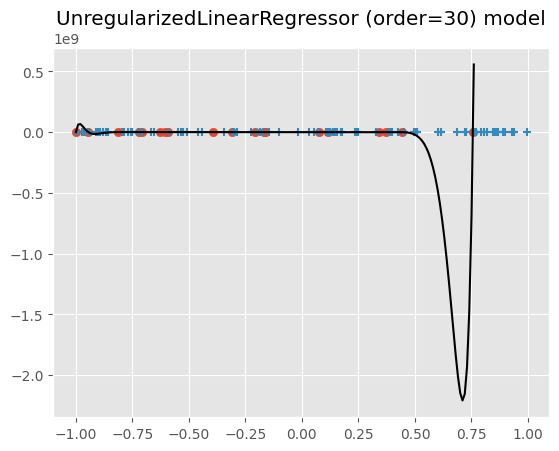

In [848]:
plt.scatter(over_x, over_y)
plt.scatter(test_x,test_y, marker='+')

x_range = np.arange(np.min(over_x), np.max(over_x) + 0.01, 0.01)
y_range = regressor.predict(x_range)
plt.plot(x_range, y_range, 'k')

plt.title('UnregularizedLinearRegressor (order=30) model')

We'll use `UnregularizedLinearRegressor` again later in the notebook.

**Note:** Before we get into regularized models, you may have noticed that we are only  using the polyfit function to get our overfit models. This is because `SGDRegressor` implements a regularization by default, and there seems to be no way to switch it off. But, you could code a linear regression model algorithm from scratch to see the similar overfitting effect shown by polyfit. 

## Regularization


It seems like overfitting producing large weights. To prevent overfitting, we will add a regularization term in our loss function that penalizes large weights. 

For the **analytical solution**, we use:

$(X^TX)^{-1} => (X^TX + \lambda I)^{-1}$ where $\lambda$ is the regularization hyperparameter that controls how much you penalize large weights.

The larger $\lambda$ is, the higher the penalty.


For **gradient descent**:

You need to change the loss function and the weight update.


Here, we will use `SGDRegressor`. We will also change the regularization to either L1 (LASSO) or L2 (Ridge). 

We will be using matrices (and not vectors) for our train and test data in the succeeding cells.

Let's convert our vectors `over_x` and `over_y` to matrices

In [849]:
X_train = np.expand_dims(over_x, axis=1)
y_train = np.expand_dims(over_y, axis=1)

print('over_x shape', over_x.shape)
print('over_y shape', over_y.shape)
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)

over_x shape (20,)
over_y shape (20,)
X_train shape (20, 1)
y_train shape (20, 1)


**Sanity Check:** Your results should be the same:
```
over_x shape (20,)
over_y shape (20,)
X_train shape (20, 1)
y_train shape (20, 1)
```
The only difference in the shapes that you should see is the additional dimension.


Let's also reuse `test_x` and `test_y` as our test data.

In [850]:
X_test = np.expand_dims(test_x, axis=1)
y_test = np.expand_dims(test_y, axis=1)

print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_test shape (100, 1)
y_test shape (100, 1)


Let's visualize our `X_train` and `X_test` and their correspoding `y` values.

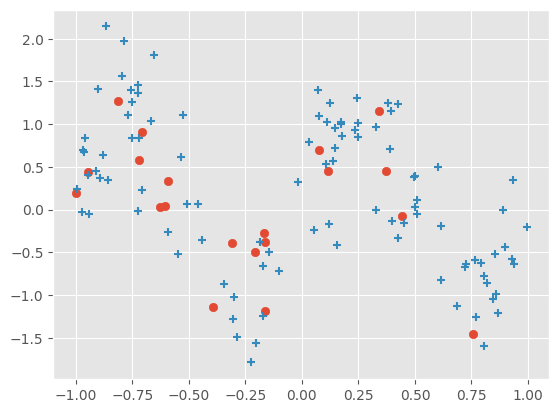

In [851]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, marker='+')

In the following parts, we will NOT use `np.polyfit()` function.

Import the `poly_feature_transform()` function.

In [852]:
from regularized_linear_regression import poly_feature_transform

Open `regularized_linear_regression.py` file and complete the `poly_feature_transform()` function. This function transforms the features to different polynomial orders.

Implement the `poly_feature_transform()` function. Inline comments should help you in completing the contents of the function.

Transform `over_x` with the degree of 1 and assign the return value to variable `sample_x`.

In [853]:
# Write your code here
sample_x = poly_feature_transform(over_x, 1)

Display the results.

In [854]:
print(sample_x)

[[-0.16595599  1.        ]
 [ 0.44064899  1.        ]
 [-0.99977125  1.        ]
 [-0.39533485  1.        ]
 [-0.70648822  1.        ]
 [-0.81532281  1.        ]
 [-0.62747958  1.        ]
 [-0.30887855  1.        ]
 [-0.20646505  1.        ]
 [ 0.07763347  1.        ]
 [-0.16161097  1.        ]
 [ 0.370439    1.        ]
 [-0.5910955   1.        ]
 [ 0.75623487  1.        ]
 [-0.94522481  1.        ]
 [ 0.34093502  1.        ]
 [-0.1653904   1.        ]
 [ 0.11737966  1.        ]
 [-0.71922612  1.        ]
 [-0.60379702  1.        ]]


__Sanity check:__ Your data should look like this:
```
[[-0.16595599  1.        ]
 [ 0.44064899  1.        ]
 [-0.99977125  1.        ]
 [-0.39533485  1.        ]
 [-0.70648822  1.        ]
 [-0.81532281  1.        ]
 [-0.62747958  1.        ]
 [-0.30887855  1.        ]
 [-0.20646505  1.        ]
 [ 0.07763347  1.        ]
 [-0.16161097  1.        ]
 [ 0.370439    1.        ]
 [-0.5910955   1.        ]
 [ 0.75623487  1.        ]
 [-0.94522481  1.        ]
 [ 0.34093502  1.        ]
 [-0.1653904   1.        ]
 [ 0.11737966  1.        ]
 [-0.71922612  1.        ]
 [-0.60379702  1.        ]]
```

Then, transform `over_x` with the degree of 4 and assign the return value to variable `sample_x`.

In [855]:
# Write your code here
sample_x = poly_feature_transform(over_x, 4)

Display the results.

In [856]:
print(sample_x[:5])

[[-1.65955991e-01  2.75413908e-02 -4.57065879e-03  7.58528208e-04
   1.00000000e+00]
 [ 4.40648987e-01  1.94171530e-01  8.55614878e-02  3.77025829e-02
   1.00000000e+00]
 [-9.99771250e-01  9.99542553e-01 -9.99313908e-01  9.99085315e-01
   1.00000000e+00]
 [-3.95334855e-01  1.56289647e-01 -6.17867450e-02  2.44264539e-02
   1.00000000e+00]
 [-7.06488218e-01  4.99125603e-01 -3.52626358e-01  2.49126367e-01
   1.00000000e+00]]


__Sanity check:__ Your data should look like this:
```
[[-1.65955991e-01  2.75413908e-02 -4.57065879e-03  7.58528208e-04
   1.00000000e+00]
 [ 4.40648987e-01  1.94171530e-01  8.55614878e-02  3.77025829e-02
   1.00000000e+00]
 [-9.99771250e-01  9.99542553e-01 -9.99313908e-01  9.99085315e-01
   1.00000000e+00]
 [-3.95334855e-01  1.56289647e-01 -6.17867450e-02  2.44264539e-02
   1.00000000e+00]
 [-7.06488218e-01  4.99125603e-01 -3.52626358e-01  2.49126367e-01
   1.00000000e+00]
 [-8.15322810e-01  6.64751285e-01 -5.41986886e-01  4.41894271e-01
   1.00000000e+00]
 [-6.27479577e-01  3.93730620e-01 -2.47057923e-01  1.55023801e-01
   1.00000000e+00]
 [-3.08878546e-01  9.54059561e-02 -2.94688530e-02  9.10229646e-03
   1.00000000e+00]
 [-2.06465052e-01  4.26278175e-02 -8.80115454e-03  1.81713083e-03
   1.00000000e+00]
 [ 7.76334680e-02  6.02695535e-03  4.67893446e-04  3.63241908e-05
   1.00000000e+00]
 [-1.61610971e-01  2.61181060e-02 -4.22097248e-03  6.82155462e-04
   1.00000000e+00]
 [ 3.70439001e-01  1.37225053e-01  5.08335116e-02  1.88307153e-02
   1.00000000e+00]
 [-5.91095501e-01  3.49393891e-01 -2.06525157e-01  1.22076091e-01
   1.00000000e+00]
 [ 7.56234873e-01  5.71891183e-01  4.32484056e-01  3.27059525e-01
   1.00000000e+00]
 [-9.45224814e-01  8.93449948e-01 -8.44511061e-01  7.98252810e-01
   1.00000000e+00]
 [ 3.40935020e-01  1.16236688e-01  3.96291576e-02  1.35109677e-02
   1.00000000e+00]
 [-1.65390395e-01  2.73539828e-02 -4.52408604e-03  7.48240378e-04
   1.00000000e+00]
 [ 1.17379657e-01  1.37779839e-02  1.61725502e-03  1.89832839e-04
   1.00000000e+00]
 [-7.19226123e-01  5.17286216e-01 -3.72045759e-01  2.67585029e-01
   1.00000000e+00]
 [-6.03797022e-01  3.64570844e-01 -2.20126790e-01  1.32911900e-01
   1.00000000e+00]]
```

Great! Now we can start training our regularized model. Our goal is to achieve good-fit models without overfitting. We will check this by visualizing the hypothesis functions.

Here, we will be using sklearn's `Lasso` and `Ridge` implementations.

____

### Lasso Regularization

Import the `Lasso` class.

In [857]:
from sklearn.linear_model import Lasso

Instantiate a `Lasso` model with the regularization parameter set to 0.0001 and the number of iterations to 1,000,000. Assign the object to variable `lasso`.

**Note**: The regularization parameter maybe named differently from what was discussed in class, so read the docs.

In [858]:
# Write your code here
lasso = Lasso(alpha=0.0001, max_iter=1000000)

Do not forget that to separately call the function `poly_feature_transform()` since Lasso does not incorporate feature transform unlike the function `np.poly1d()`. For now, set the polynomial order to 1. Assign the return value to variable `poly_x`.

In [859]:
# Write your code here
poly_x = poly_feature_transform(X_train, 1)

Then, train the model.

In [860]:
# Write your code here
lasso.fit(poly_x, over_y)

Lasso(alpha=0.0001, max_iter=1000000)

Make predictions on the training data and assign the return value to variable `y_predicted`.

In [861]:
# Write your code here
y_predicted = lasso.predict(poly_x)

Compute the RMSE on the train data and assign the return value to variable `train_rmse`.

In [862]:
# Write your code here
train_rmse = compute_RMSE(y_train, y_predicted)

Display the result.

In [863]:
print('Lasso (order=1) train error: ' + '{:.4f}'.format(train_rmse))

Lasso (order=1) train error: 0.7639


And, finally, we will check if it did well on our test data as well. Make predictions on the test data and assign the return value to variable `y_predicted`.

In [864]:
# Write your code here
y_predicted = lasso.predict(poly_feature_transform(test_x, 1))

Compute the RMSE on the test data and assign the return value to variable `test_rmse`.

In [865]:
# Write your code here
test_rmse = compute_RMSE(y_test, y_predicted)

Display the result.

In [866]:
print('Lasso (order=1) test error: ' + '{:.4f}'.format(test_rmse))

Lasso (order=1) test error: 0.9653


<span style="color:red;">**Question 3-7**:  What is the test RMSE of our model? Limit to 4 decimal places.</span>

Visualize our model. Let's see how well our simple `Lasso` model fared.

Text(0.5, 1.0, 'Lasso (order=1) model')

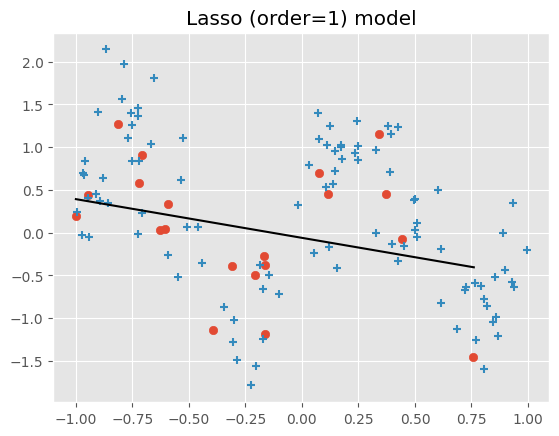

In [867]:
plt.scatter(X_train, y_train)
plt.scatter(X_test,y_test, marker='+')

x_range = np.expand_dims(np.arange(np.min(over_x), np.max(over_x) + 0.01, 0.01), axis=1)
y_range = lasso.predict(poly_feature_transform(x_range, poly_order=1))
plt.plot(x_range, y_range, 'k')

plt.title('Lasso (order=1) model')

<span style="color:red;">**Question 3-8:** What main type of error does the model above have? Bias or variance?</span>

Great! We just created a `Lasso` model with a poly degree of 1. Let's now create a `Lasso` model with a higher complexity. 

Instantiate a `Lasso` model with the regularization parameter set to 0.0001 and the number of iterations to 1,000,000. Assign the object to variable `lasso`. Set the polynomial order to 30.

In [868]:
# Write your code here
lasso = Lasso(alpha=0.0001, max_iter=1000000)
poly_x = poly_feature_transform(X_train, 30)

Then, train the model.

In [869]:
# Write your code here
lasso.fit(poly_x, y_train)

Lasso(alpha=0.0001, max_iter=1000000)

Make predictions on the training data and assign the return value to variable `y_predicted`.

In [870]:
# Write your code here
y_predicted = lasso.predict(poly_x)

Compute the RMSE on the train data and assign the return value to variable `train_rmse`.

In [871]:
# Write your code here
train_rmse = compute_RMSE(y_train, y_predicted)

Display the result.

In [872]:
print('Lasso (order=30) train error: ' + '{:.4f}'.format(train_rmse))

Lasso (order=30) train error: 0.9926


Now, compute the RMSE on the test data and assign the return value to variable `test_rmse`.

In [873]:
# Write your code here
test_rmse = compute_RMSE(y_test, lasso.predict(poly_feature_transform(X_test, 30)))

Display the results.

In [874]:
print('Lasso (order=30) test error: ' + '{:.4f}'.format(test_rmse))

Lasso (order=30) test error: 1.5188


<span style="color:red;">**Question 3-9**:  What is the test RMSE of our model? Limit to 4 decimal places.</span>

1.5188


<span style="color:green;">**Question**: Recall the train and test results of our `UnregularizedLinearRegressor` with polynomial order 30. 
Describe the train and test error of the `UnregularizedLinearRegressor` model (i.e., is the error high? is the error low?). Describe the train and test error of the `Lasso` model (i.e., is the error high? is the error low?).</span>

<span style="color:red;">**Question 3-10**: What error did the `Lasso` model reduce? Bias or variance error?</span>

variance

Visualize our model. Let's see how well our simple `Lasso` model fared.

Text(0.5, 1.0, 'Lasso (order=30) model')

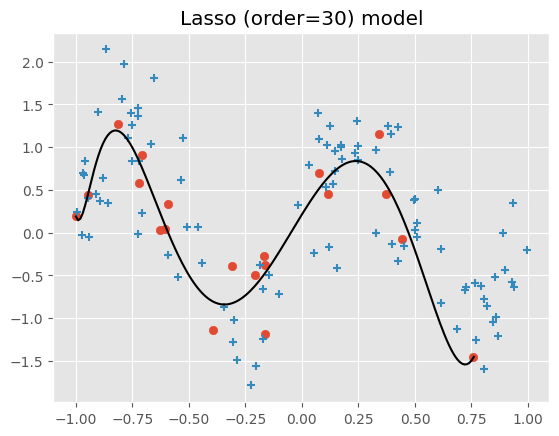

In [875]:
plt.scatter(X_train, y_train)
plt.scatter(X_test,y_test, marker='+')

x_range = np.expand_dims(np.arange(np.min(over_x), np.max(over_x) + 0.01, 0.01), axis=1)
y_range = lasso.predict(poly_feature_transform(x_range, poly_order=30))
plt.plot(x_range, y_range, 'k')

plt.title('Lasso (order=30) model')

<span style="color:red;">**Question 3-11**: Compare this with the `Lasso` order=1 model. Which of the following best describes our model: (A) overfit, (B) underfit, or (C) fits the data well?</span>

C

### Visualizing `Lasso` with increasing polynomial orders

From our example above, we can clearly see that our regularized `Lasso` model shows improvement versus the unregularized model. Let's see its behavior across increasing polynomial orders.

In [876]:
orders = [1, 3, 5, 7, 10, 12, 20, 30, 50]

Instantiate a `Lasso` model with the regularization parameter set to 0.0001 and the number of iterations to 1,000,000. Assign the object to variable `lasso`.

In [877]:
# Write your code here
lasso = Lasso(alpha=0.0001, max_iter=1000000)

To make the following code work, you have to do the following per iteration:
1. Perform polynomial feature transform on the training data according to the current polynomial order
1. Train the model to your transformed train data and the training labels
1. Perform polynomial feature transform `x_range` according to the current polynomial order
1. Make the model run predictions on your transformed `x_range`
1. Collect the weights per model (this is not really needed for the visuals, but we want to see the weights later on)

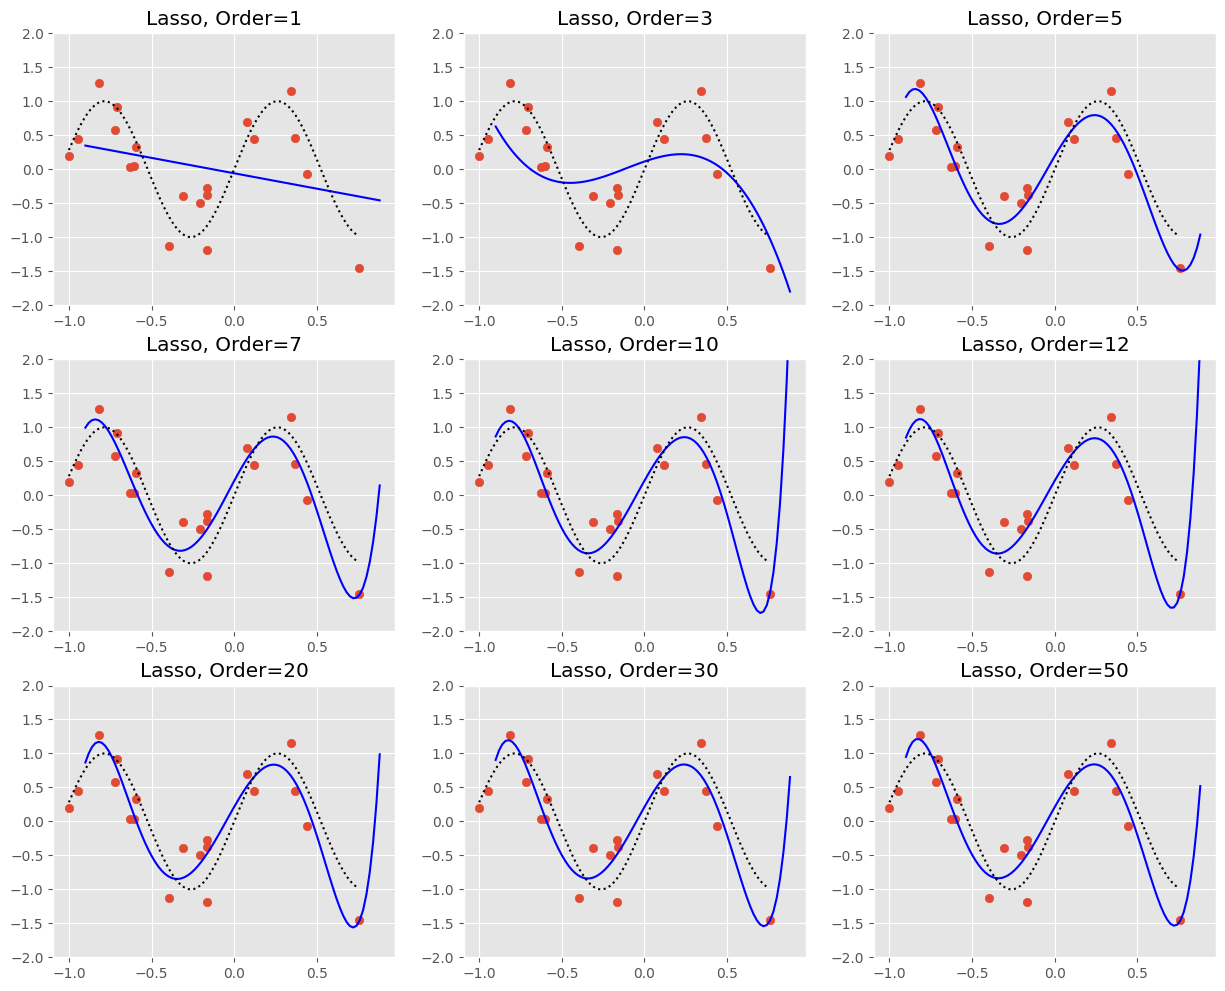

In [878]:
weights = {}

plt.figure(figsize=(15, 12))
for i in range(len(orders)):
    order = orders[i]
        
    # Write your code here
    poly_x = poly_feature_transform(X_train, order)
    lasso.fit(poly_x, y_train)
    
    # Plotting the hypothesis function
    # Plotting the predictions for a range of x (this draws our hypothesis function)
    X_range = np.expand_dims(np.arange(-0.9, 0.9, 0.02), 1)
    
    # Write your code here
    X_range_poly = poly_feature_transform(X_range, order)
    y_range_predicted = lasso.predict(X_range_poly)
    
    # This just plots the i + 1 figure in the 3x3 figure grid
    plt.subplot(3, 3, i + 1)
    
    # Plotting the training data
    plt.scatter(X_train, y_train)
    # Plotting the hypothesis function
    plt.plot(X_range, y_range_predicted, 'b')
    
    # Plotting the optimal answer
    x_range_optimal = np.arange(np.min(X_train), np.max(X_train), 0.01)
    y_range_optimal = np.sin(6 * x_range_optimal)
    plt.plot(x_range_optimal, y_range_optimal, 'k:')
    
    # Change the limit, and order "titles"
    plt.ylim(-2, 2)
    plt.title('Lasso, Order=' + str(order))
    
    # Write your code here
    weights[order] = lasso.coef_

### Checking the Lasso weights
Let's see the effect on the `Lasso` (L1) regularization on the weights

In [879]:
for i in orders:
    length = weights[i].shape[0]
    bound = np.min([length, 10])
    curweights = weights[i][:bound]
    print('order =', i, end='\t')
    for weight in curweights:
        print(str(weight),end='\t')
    print('')

order = 1	-0.4531470629504367	0.0	
order = 3	0.8364262077609245	-0.9564962448340829	-2.802027461923744	0.0	
order = 5	4.152860305146801	-2.670626112088429	-19.05077068560118	3.2703289355483967	15.686536539050177	0.0	
order = 7	4.530762275807106	-2.460168326956824	-22.474150538688008	-0.0	20.592925328551612	4.948776820085025	-0.0	0.0	
order = 10	4.311301978828661	-2.58741103844145	-17.8708147019974	0.0	0.0	2.3126894519915697	22.929801832812135	0.0	0.0	9.570469622621466	
order = 12	4.224102041932171	-2.665171125497366	-17.168868630047566	-0.0	0.0	4.581508053572847	21.154904339309944	0.0	0.0	0.0	
order = 20	4.25038412073481	-2.651668790403452	-18.267087367619766	-0.0	6.574630981683567	5.722101539655601	12.804040953532065	0.0	0.0	0.0	
order = 30	4.284558990883212	-2.6165330076930795	-18.92893059494261	-0.0	9.361575860644596	5.662826223930305	9.772777114145173	0.0	0.0	0.0	
order = 50	4.305586945096612	-2.5944327656609696	-19.30769161402749	-0.0	10.857466631857932	5.592711072095234	8.2127960

**Sanity Check:** You should not see the weights straying away from 0 like they did before applying regularization. You will also see some weights turn into 0.0

_______

### Ridge Regularization

Import the `Ridge` class.

In [880]:
from sklearn.linear_model import Ridge

Instantiate a `Ridge` model with the regularization parameter set to 0.0001 and the solver to `auto`. Assign the object to variable `ridge`.

**Note**: The regularization parameter maybe named differently from what was discussed in class, so read the docs.

In [881]:
# Write your code here
ridge = Ridge(alpha=0.0001, solver='auto')

Do not forget that to separately call the function `poly_feature_transform()` since Ridge does not incorporate feature transform unlike the function `np.poly1d()`. For now, set the polynomial order to 1. Assign the return value to variable `poly_x`.

In [916]:
# Write your code here
X_train = np.expand_dims(X_train, axis=1)
poly_x = poly_feature_transform(X_train, 1)

Then, train the model.

In [917]:
# Write your code here
ridge.fit(poly_x, y_train)

Ridge(alpha=0.0001)

Make predictions on the training data and assign the return value to variable `y_predicted`.

In [918]:
# Write your code here
y_predicted = ridge.predict(poly_x)

Compute the RMSE on the train data and assign the return value to variable `train_rmse`.

In [919]:
# Write your code here
train_rmse = compute_RMSE(y_train, y_predicted)

Display the results.

In [920]:
print('Ridge (order=1) train error: ' + '{:.4f}'.format(train_rmse))

Ridge (order=1) train error: 0.7640


And, finally, we will check if it did well on our test data as well. Make predictions on the test data and assign the return value to variable `y_predicted`.

In [921]:
# Write your code here
y_predicted = ridge.predict(poly_x)

Compute the RMSE on the test data and assign the return value to variable `test_rmse`.

In [922]:
# Write your code here
test_rmse = compute_RMSE(y_test, y_predicted)

Display the results.

In [923]:
print('Ridge (order=1) test error: ' + '{:.4f}'.format(test_rmse))

Ridge (order=1) test error: 0.9265


<span style="color:red;">**Question 3-12**:  What is the test RMSE of our model? Limit to 4 decimal places.</span>

Visualize our model. Let's see how well our simple `Ridge` model fared.

Text(0.5, 1.0, 'Ridge (order=1) model')

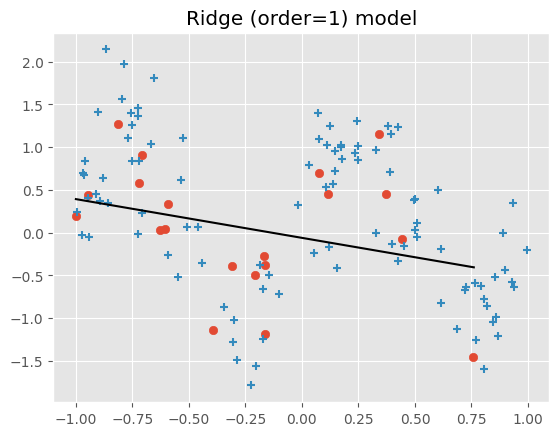

In [890]:
plt.scatter(X_train, y_train)
plt.scatter(X_test,y_test, marker='+')

x_range = np.expand_dims(np.arange(np.min(over_x), np.max(over_x) + 0.01, 0.01), axis=1)
y_range = ridge.predict(poly_feature_transform(x_range, poly_order=1))
plt.plot(x_range, y_range, 'k')

plt.title('Ridge (order=1) model')

Just like in `Lasso`, we will also create a `Ridge` model with a higher complexity, where polynomial order is set to 30. 

Instantiate a `Ridge` model with the regularization parameter set to 0.0001 and the solver to `auto`. Assign the object to variable `ridge`. Set the polynomial order to 30.

In [899]:
# Write your code here
ridge = Ridge(alpha=0.0001, solver='auto')
poly_x = poly_feature_transform(X_train, 30)

Then, train the model.

In [900]:
# Write your code here
ridge.fit(poly_x, y_train)

Ridge(alpha=0.0001)

Make predictions on the training data and assign the return value to variable `y_predicted`.

In [901]:
# Write your code here
y_predicted = ridge.predict(poly_x)

Compute the RMSE on the train data and assign the return value to variable `train_rmse`.

In [902]:
# Write your code here
train_rmse = compute_RMSE(y_train, y_predicted)

Display the results.

In [903]:
print("Ridge (order=30) train error: " + '{:.4f}'.format(train_rmse))

Ridge (order=30) train error: 0.9952


Now, compute the RMSE on the test data and assign the return value to variable `test_rmse`.

In [905]:
# Write your code here
test_rmse = compute_RMSE(y_test, ridge.predict(poly_feature_transform(X_test, 30)))

Display the results.

In [906]:
print('Ridge (order=30) test error: ' + '{:.4f}'.format(test_rmse))

Ridge (order=30) test error: 5.3695


<span style="color:red;">**Question 3-13**:  What is the test RMSE of our model? Limit to 4 decimal places.</span>

5.3695

Visualize our model. Let's see how well our `Ridge` (order=30) model performed.

Text(0.5, 1.0, 'Ridge (order=1) model')

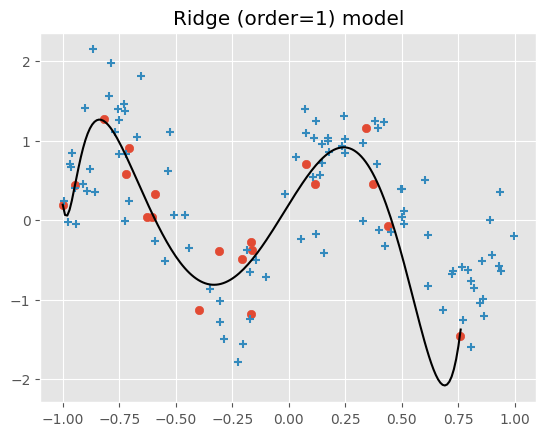

In [907]:
plt.scatter(X_train, y_train)
plt.scatter(X_test,y_test, marker='+')

x_range = np.expand_dims(np.arange(np.min(over_x), np.max(over_x) + 0.01, 0.01), axis=1)
y_range = ridge.predict(poly_feature_transform(x_range, poly_order=30))
plt.plot(x_range, y_range, 'k')

plt.title('Ridge (order=1) model')

<span style="color:red;">**Question 3-14**: What error did the `Ridge` model reduce? Bias or variance error?</span>

variance

<span style="color:red;">**Question 3-15**: Why did the unregularized model achieve a lower train error?</span>

the previous model overfitted and had more oscillations

<span style="color:red;">**Question 3-16**: Why did the regularized models achieve a lower test error?</span>

minimizes noise  

### Visualizing `Ridge` with increasing polynomial orders

From our example above, we can clearly see that our regularized `Ridge` model did not overfit the data unlike `UnregularizedLinearRegressor`. Let's also see its behavior across increasing polynomial orders.

In [924]:
orders = [1, 3, 5, 7, 10, 12, 20, 30, 50]

Instantiate a `Ridge` model with the regularization parameter set to 0.0001 and the solver to `auto`. Assign the object to variable `ridge`.

In [925]:
# Write your code here
ridge = Ridge(alpha=0.0001, solver='auto')

To make the following code work, you have to do the following per iteration:
1. Perform polynomial feature transform on the training data according to the current polynomial order
1. Train the model to your transformed train data and the training labels
1. Perform polynomial feature transform `x_range` according to the current polynomial order
1. Make the model run predictions on your transformed `x_range`
1. Collect the weights per model

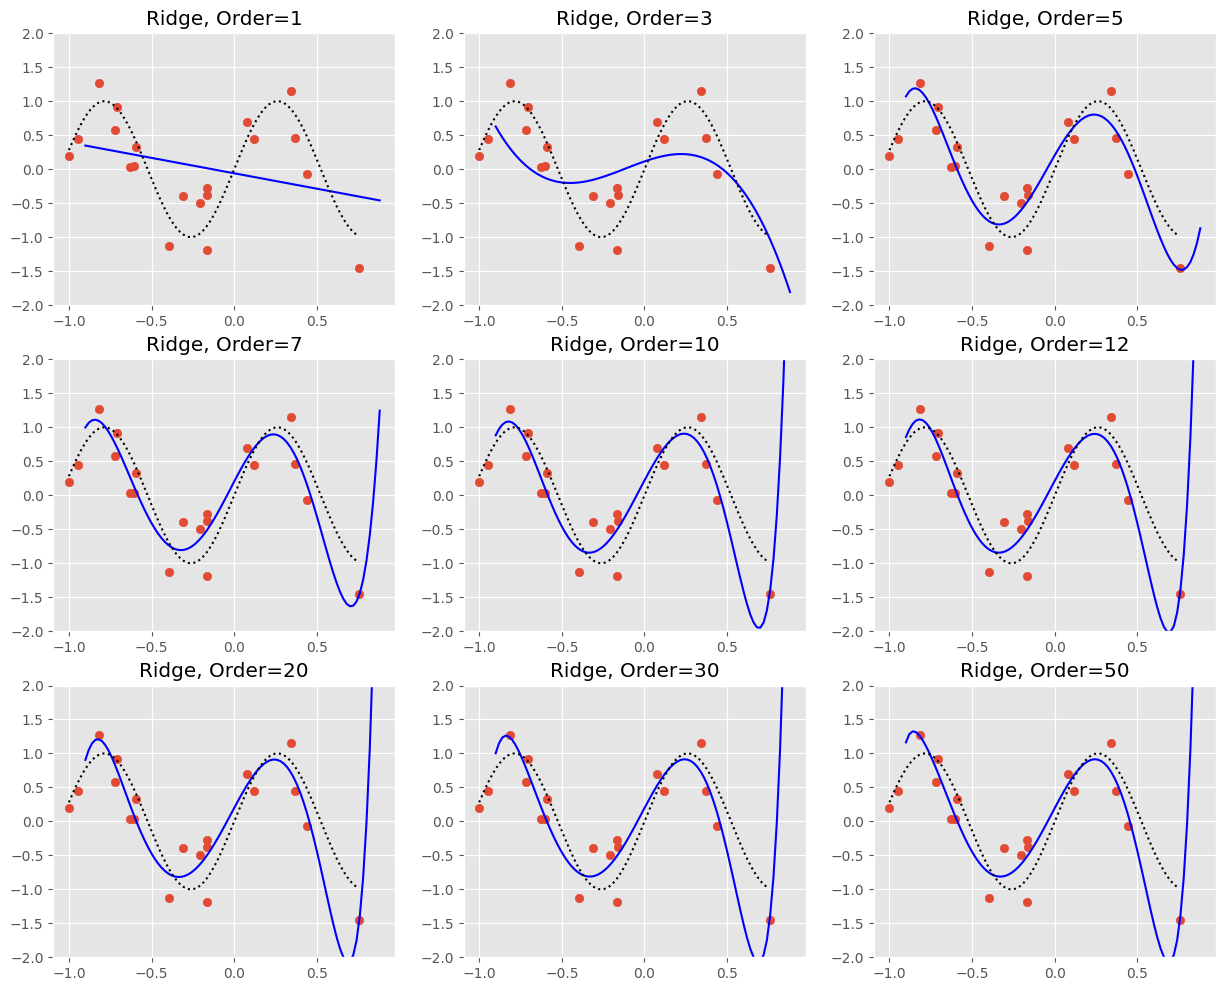

In [927]:
weights = {}

plt.figure(figsize=(15, 12))
for i in range(len(orders)):
    order = orders[i]
        
    # Write your code here
    poly_x = poly_feature_transform(X_train, order)
    ridge.fit(poly_x, y_train)
    
    # Plotting the hypothesis function
    # Plotting the predictions for a range of x (this draws our hypothesis function)
    X_range = np.expand_dims(np.arange(-0.9, 0.9, 0.02), 1)
    
    # Write your code here
    X_range_poly = poly_feature_transform(X_range, order)
    y_range_predicted = ridge.predict(X_range_poly)
    
    # This just plots the i+1 figure in the 3x3 figure grid
    plt.subplot(3, 3, i + 1)
    
    # Plotting the training data
    plt.scatter(X_train, y_train)
    # Plotting the hypothesis function
    plt.plot(X_range, y_range_predicted, 'b')
    
    # Plotting the optimal answer
    x_range_optimal = np.arange(np.min(X_train), np.max(X_train), 0.01)
    y_range_optimal = np.sin(6 * x_range_optimal)
    plt.plot(x_range_optimal, y_range_optimal, 'k:')
    
    # Change the limit, and order "titles"
    plt.ylim(-2, 2)
    plt.title('Ridge, Order=' + str(order))
    
    # Write your code here
    weights[order] = ridge.coef_

### Checking the Ridge weights
Let's see the effect on the `Ridge` (L2) regularization on the weights

In [928]:
for i in orders:
    length = weights[i].shape[0]
    bound = np.min([length, 10])
    curweights = weights[i][:bound]
    print('order =', i, end='\t')
    for weight in curweights:
        print(str(weight),end='\t')
    print('')

order = 1	-0.45356406557165224	0.0	
order = 3	0.8416156909309741	-0.9627770668307681	-2.814071110268318	0.0	
order = 5	4.1896192937703605	-2.8616568605997577	-19.33919941746681	3.5812922837205523	16.076781836335947	0.0	
order = 7	4.6549431825712055	-1.7754484989385286	-23.352793666013664	-4.653804508297432	19.542783065367253	11.022664616783208	3.900631686833631	0.0	
order = 10	4.570577667972865	-2.0704473857322143	-20.406622088543322	-3.7195936647038645	4.78757489908663	4.765404165093401	15.860277924616803	2.985187477608355	9.01592945826088	11.778838153726912	
order = 12	4.515221999209928	-1.8629621193677774	-19.738593725908416	-5.431625019132473	3.684018622408686	7.696584173737544	12.914984104914092	3.9681931225537967	12.123291216694328	3.0087847742508464	
order = 20	4.5414012555092995	-1.28700601683272	-20.52052475816879	-8.043080073029387	6.794554122351656	8.325163134365994	10.275682848478027	8.832371023169344	7.858581292628628	5.379254933220864	
order = 30	4.574830926970833	-1.2613

__Sanity Check:__ You should see the weights being closer to 0 compared to the `UnregularizedLinearRegressor`

____

### Effect of the regularization parameter

Let's try to adjust the regularization parameter and check its effect on the model. 

We'll just reuse our `Ridge` model from the previous cells, but we will change the regularization parameter to `40`.

Instantiate a `Ridge` model with the regularization parameter set to 40 and the solver to `auto`. Assign the object to variable `ridge`.

In [929]:
# Write your code here
ridge = Ridge(alpha=40, solver='auto')

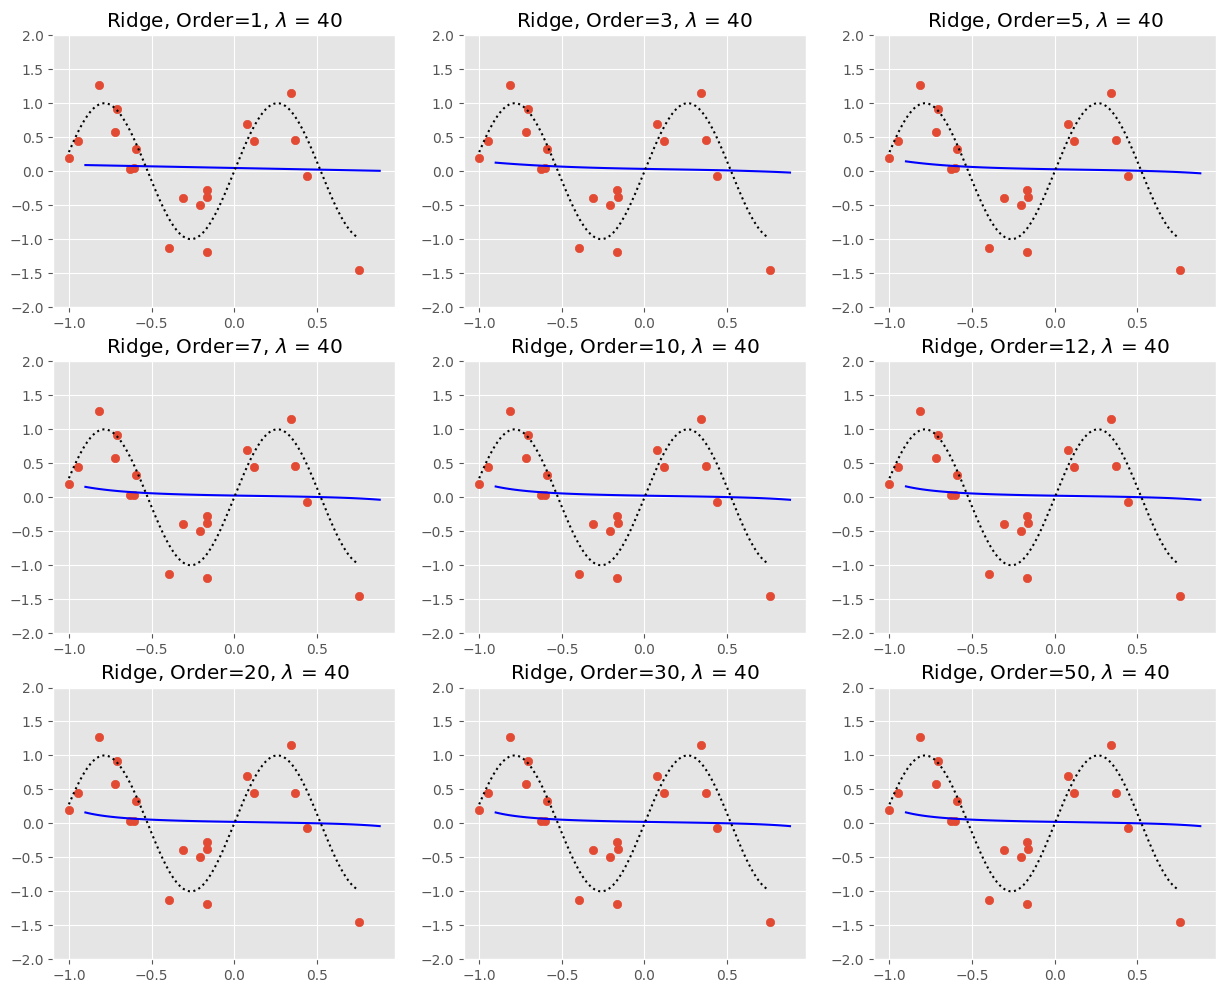

In [930]:
weights = {}

plt.figure(figsize=(15, 12))
for i in range(len(orders)):
    order = orders[i]
        
    # Write your code here
    poly_x = poly_feature_transform(X_train, order)
    ridge.fit(poly_x, y_train)
    
    # Plotting the hypothesis function
    # Plotting the predictions for a range of x (this draws our hypothesis function)
    X_range = np.expand_dims(np.arange(-0.9, 0.9, 0.02), 1)
    
    # Write your code here
    X_range_poly = poly_feature_transform(X_range, order)
    y_range_predicted = ridge.predict(X_range_poly)
    
    # This just plots the i+1 figure in the 3x3 figure grid
    plt.subplot(3, 3, i + 1)
    
    # Plotting the training data
    plt.scatter(X_train, y_train)
    # Plotting the hypothesis function
    plt.plot(X_range, y_range_predicted, 'b')
    
    # Plotting the optimal answer
    x_range_optimal = np.arange(np.min(X_train), np.max(X_train), 0.01)
    y_range_optimal = np.sin(6 * x_range_optimal)
    plt.plot(x_range_optimal, y_range_optimal, 'k:')
    
    # Change the limit, and order "titles"
    plt.ylim(-2, 2)
    plt.title('Ridge, Order=' + str(order) + ', $\lambda$ = 40')
    
    # Write your code here
    weights[order] = ridge.coef_

<span style="color:red;">**Question 3-17**: What happened to the models when we set the regularization parameter to 40 (compared to the original `Ridge` model)? Why are we seeing this behavior?</span>

Then, let's do the opposite. 

Instantiate a `Ridge` model with the regularization parameter set to 0 and the solver to `auto`. Assign the object to variable `ridge`.

In [931]:
# Write your code here
ridge = Ridge(alpha=0, solver='auto')

C:\Users\Justin Sacdalan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Justin Sacdalan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\Justin Sacdalan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


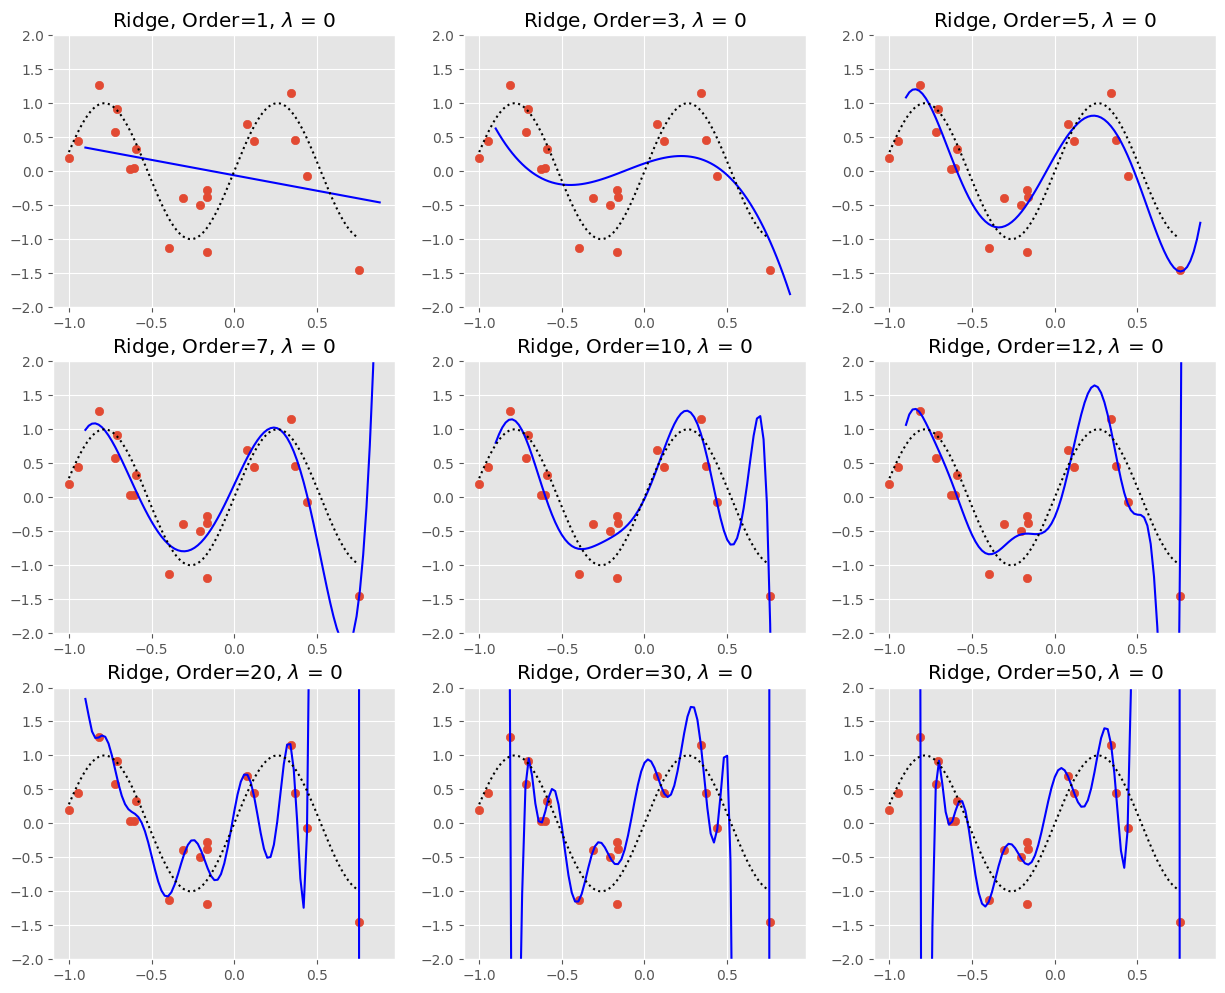

In [932]:
weights = {}

plt.figure(figsize=(15, 12))
for i in range(len(orders)):
    order = orders[i]
        
    # Write your code here
    poly_x = poly_feature_transform(X_train, order)
    ridge.fit(poly_x, y_train)
    
    # Plotting the hypothesis function
    # Plotting the predictions for a range of x (this draws our hypothesis function)
    X_range = np.expand_dims(np.arange(-0.9, 0.9, 0.02), 1)
    
    # Write your code here
    X_range_poly = poly_feature_transform(X_range, order)
    y_range_pred = ridge.predict(X_range_poly)
    
    # This just plots the i+1 figure in the 3x3 figure grid
    plt.subplot(3, 3, i + 1)
    
    # Plotting the training data
    plt.scatter(X_train, y_train)
    # Plotting the hypothesis function
    plt.plot(X_range,y_range_pred, 'b')
    
    # Plotting the optimal answer
    x_range_optimal = np.arange(np.min(X_train), np.max(X_train), 0.01)
    y_range_optimal = np.sin(6 * x_range_optimal)
    plt.plot(x_range_optimal, y_range_optimal, 'k:')
    
    # Change the limit, and order "titles"
    plt.ylim(-2, 2)
    plt.title('Ridge, Order=' + str(order) + ', $\lambda$ = 0')
    
    # Write your code here
    weights[order] = ridge.coef_

____

## Another way of preventing overfit models

In class, we discussed that having more data points will prevent overfitting. Let's see what hypothesis function we'll end up with if we have more than 20 data points.

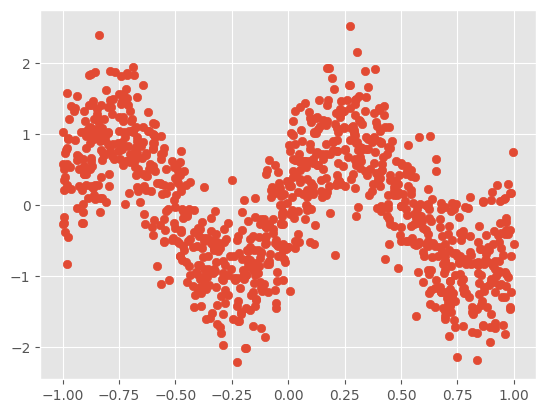

In [934]:
pts = 1000

# Write your code here
over_x, over_y = generate_sample_data(pts)

plt.scatter(over_x,over_y)

We will create an `UnregularizedLinearRegressor` and apply it with different polynomial orders again but now with more training data.

In [935]:
orders = np.arange(1, 40, 2)

To make the following code work, you have to do the following per iteration:
1. Create an `UnregularizedLinearRegressor` with the polynomial degree matching the current iteration's order
1. Fit the model to our new data
1. Make the model run predictions on our new data

c:\Users\Justin Sacdalan\Documents\College Files\3rd Year\2nd Sem\STINTSY\NBs\regularized-linear-regression-release\regularized_linear_regression.py:83: RankWarning: Polyfit may be poorly conditioned
  
c:\Users\Justin Sacdalan\Documents\College Files\3rd Year\2nd Sem\STINTSY\NBs\regularized-linear-regression-release\regularized_linear_regression.py:83: RankWarning: Polyfit may be poorly conditioned
  
c:\Users\Justin Sacdalan\Documents\College Files\3rd Year\2nd Sem\STINTSY\NBs\regularized-linear-regression-release\regularized_linear_regression.py:83: RankWarning: Polyfit may be poorly conditioned
  


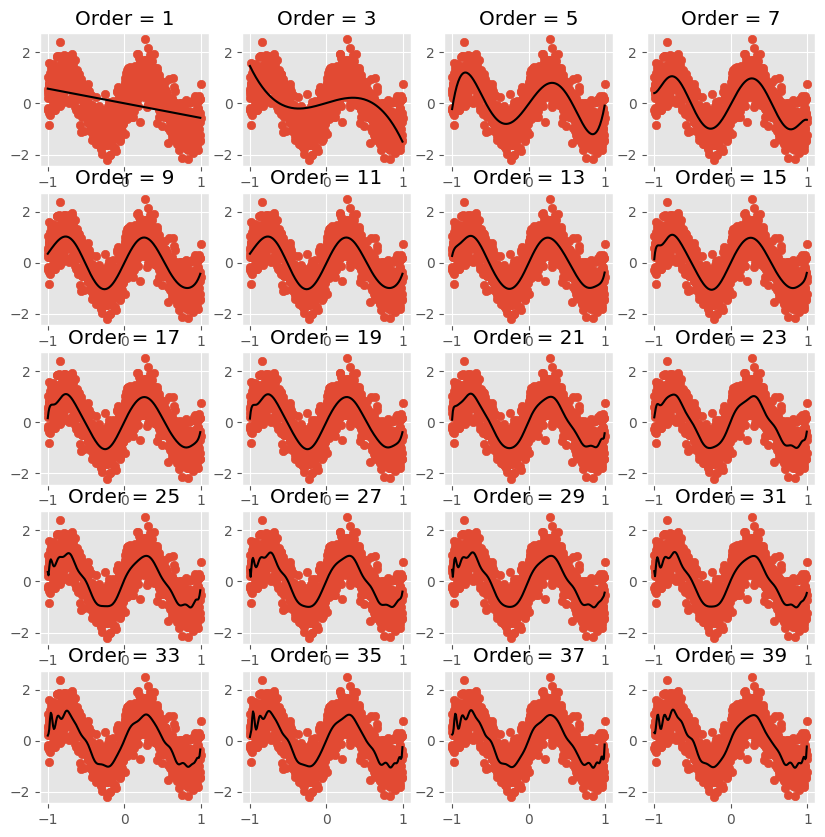

In [938]:
weights = {}
plt.figure(figsize=(10, 10))
for i in range(len(orders)):
    order = orders[i]

    # Write your code here
    regressor = UnregularizedLinearRegressor(order)
    regressor.compute_weights(over_x, over_y)
    
    plt.subplot(5, 4, i + 1)
    plt.scatter(over_x, over_y)

    X_range = np.arange(np.min(over_x), np.max(over_x), 0.01)
    
    # Write your code here
    y_range_predicted = regressor.predict(X_range)
    
    plt.plot(X_range, y_range_predicted, 'k')
    plt.title('Order = ' + str(orders[i]))

As you can see, even without regularization, the more data we have, our model is more consistent and less likely to overfit. This suggests that overfitting is relative to the **complexity** of the hypothesis function as well as the **number of data points** in your training set.

## Summary

Congratulations!

You have now created a linear regression model that can fit a complex function without running into the problem of overfitting. 

<img src="http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png">
In the figure above, we want to be where the error is the lowest

To **summarize**:
* We definitely do not want to underfit, so we allow feature transform to properly capture data
* But we don't want to overfit either by doing feature transform, so we must make sure that we don't overfit by keeping an eye on the weights.
* We do this by updating our loss function to also consider large weights (weights far from zero) as additional loss
* Weights now update to make sure that training error is minimal and weights be as close to 0 as possible.



Next, we will move on to logistic regression, which builds on top of linear regression. Unlike linear regression, logistic regression is a classification technique.

See you in the next notebook!

### <center>fin</center>


<!-- DO NOT MODIFY OR DELETE THIS -->

<sup>made/compiled by daniel stanley tan & courtney anne ngo 🐰 & thomas james tiam-lee</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup>
<sup> danieltan07@gmail.com & courtneyngo@gmail.com & thomasjamestiamlee@gmail.com</sup><br>
<sup>please cc your instructor, too</sup>
<!-- DO NOT MODIFY OR DELETE THIS -->